In [85]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [86]:
def load_dataset(csv_path):
    df = pd.read_csv(csv_path, sep=';')
    required_columns = ['Azimuth', 'Altitude','Timestamp']

    if not all(col in df.columns for col in required_columns):
        raise ValueError("Reguired columns are not present in the DataFrame.")

    X = df[['Azimuth','Altitude']].values
    y = df['Timestamp'].values
    return X,y, df

In [87]:
csv_path = 'cleaned/cleaned_data_quartal_1_2020.csv'

In [88]:
X, y, df = load_dataset(csv_path)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [115]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_normalized, y_train, epochs=80, batch_size=32, validation_split=0.2)
predictions = model.predict(X_test_normalized)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Epoch 1/80
263/263 [==============================] - 3s 7ms/step - loss: 5246293639168.0000 - val_loss: 5167177007104.0000
Epoch 2/80
263/263 [==============================] - 2s 6ms/step - loss: 5229160955904.0000 - val_loss: 5187536683008.0000
Epoch 3/80
263/263 [==============================] - 2s 6ms/step - loss: 5237107064832.0000 - val_loss: 5238541516800.0000
Epoch 4/80
263/263 [==============================] - 2s 6ms/step - loss: 5238866575360.0000 - val_loss: 5188116021248.0000
Epoch 5/80
263/263 [==============================] - 2s 6ms/step - loss: 5258358030336.0000 - val_loss: 5574653116416.0000
Epoch 6/80
263/263 [==============================] - 1s 6ms/step - loss: 5241763266560.0000 - val_loss: 5203607683072.0000
Epoch 7/80
263/263 [==============================] - 1s 6ms/step - loss: 5269586182144.0000 - val_loss: 5210927267840.0000
Epoch 8/80
263/263 [==============================] - 2s 6ms/step - loss: 5238717677568.0000 - val_loss: 5170793545728.0000
Epoch 9/

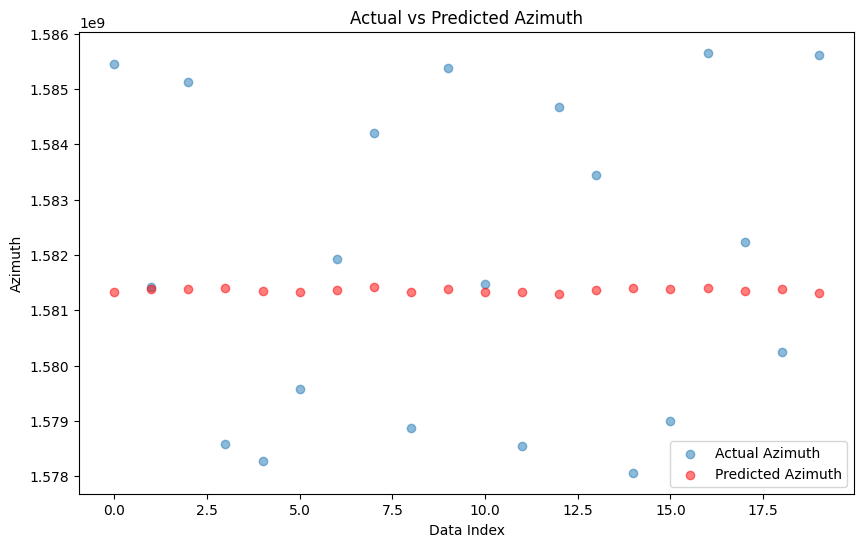

In [114]:
plt.figure(figsize=(10, 6))

# Ambil hanya 10 data
num_data_to_plot = 20
X_test_subset = X_test[:num_data_to_plot]
y_test_subset = y_test[:num_data_to_plot]

# Plot azimuth aktual
plt.scatter(range(num_data_to_plot), y_test_subset, label='Actual Azimuth', alpha=0.5)

# Plot azimuth prediksi
predictions_subset = predictions[:num_data_to_plot]
plt.scatter(range(num_data_to_plot), predictions_subset, label='Predicted Azimuth', color='red', alpha=0.5)

plt.title('Actual vs Predicted Azimuth')
plt.xlabel('Data Index')
plt.ylabel('Azimuth')
plt.legend()
plt.show()